In [79]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from libs_common import *
from ai_track_2_common import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
%cd ../All_notebook/

/home/bnminh/projects/ai2/SOURCE/All_notebook


In [3]:
def parse_line(line):
    line_split = line.strip().split(' ')
    path = line_split[0]
    key_coords = []
    orien= line_split[-1]
    for i in range(1,40,2):
        x1,y1 = int(line_split[i]), int(line_split[i+1])
        key_coords.append([x1,y1])
    return path,key_coords,orien
    

In [4]:
keypoints_file = open(VERI_KEYPOINT_FILE_TEST).readlines()


In [5]:
lst_orien=['5','2','0','1','4','7']

lst_orien_key={
    '5': [3,4, 16],
    '2': [1,2, 15],
    '0': [7,8,9],
    '1': [17,18,19],
    '3': [15],
    '4':[15],
    '6':[16],
    '7':[16],
    
}
delta={
    ('5',3):[20,20],
    ('5',4):[20,20],
    ('2',1):[20,20],
    ('2',2):[20,20],
    ('0',7):[20,20],
    ('0',8):[30,20],
    ('1',17):[30,20],
    ('1',18):[30,20],
    
    ('3',15):[30,30],
    ('4',15):[30,30],
    ('6',16):[30,30],
    ('7',16):[30,30],
    ('0', 9): [40,20],
    ('1', 19): [40,40]
}
key_names={
    '3':"wheel",
    '4':"wheel",
    '1':"wheel",
    '2':"wheel",
    '7':"front_light",
    '8':"front_light",
    '17':"rear_light",
    '18':"rear_light",
    '15': "back_corner",
    '16': "back_corner",
    '9': "front_logo_area",
    '19': "rear_logo_area"

}

ignored_key = [1,2,3,4,7,8,17,18]

key_detected_list = []
SAVE_DIR= BOUNDINGBOX_VERI_TEST_SAVE_DIR_BATCH_2
if os.path.exists(SAVE_DIR) is False:
    os.makedirs(SAVE_DIR)

In [6]:
for i in range(len(keypoints_file)):
    try: 
        path, key_coords, orien = parse_line(keypoints_file[i])
        if orien not in lst_orien:
            continue
        if os.path.exists(os.path.join(VERI_ROOT, path)) is False:
            print('not existed')
            continue   
        
        file_out =  open(os.path.join(SAVE_DIR, os.path.basename(path).replace('jpg','txt')),'w')
        
        for key in lst_orien_key[orien]:
            if key in ignored_key:
                continue # ignore old keys
            key = key-1
            #resize img
            img = Image.open(os.path.join(VERI_ROOT, path))
            img_np = np.asarray(img)
            orig_max_y, orig_max_x = img_np.shape[:2]
            img_np_resize= cv2.resize(img_np,(256, 256))

            #relocate key
            key_coords[key][0] = int(256.0/orig_max_x * key_coords[key][0])
            key_coords[key][1] = int(256.0/orig_max_y * key_coords[key][1])

            #apply delta
            print(delta[(orien,key+1)][0], delta[(orien,key+1)][1])
            #print(key_names[str(key+1)])
            print(orien, key)
            key_min_x = key_coords[key][0]-delta[(orien,key+1)][0]
            key_max_x = key_coords[key][0]+delta[(orien,key+1)][0]
            key_min_y = key_coords[key][1]-delta[(orien,key+1)][1]
            key_max_y = key_coords[key][1]+delta[(orien,key+1)][1]

            
                            
            #restore key_orig to original 
            key_min_x = int(key_min_x * orig_max_x/256.0)
            key_max_x = int(key_max_x * orig_max_x/256.0)
            key_min_y = int(key_min_y * orig_max_y/256.0)
            key_max_y = int(key_max_y * orig_max_y/256.0)
            
            ret = np.asarray(img_np)[ key_min_y:key_max_y,key_min_x:key_max_x,:]
            if 0 in ret.shape:
                continue
                
            key_min_x = max(key_min_x, 0)
            key_min_y = max(key_min_y, 0)
            key_max_x = min(key_max_x, orig_max_x)
            key_max_y = min(key_max_y, orig_max_y)

            
            #if key_min_x < 0 or key_max_x > orig_max_x or key_min_y <0 or key_max_y > orig_max_y:
            #    print('bounding box outside img,skip')
                
            #0
            print('{} {} {} {} {}'.format(key_names[str(key+1)], key_min_x,key_min_y, key_max_x, key_max_y),file=file_out)
            #key_detected_list.append(key+1)

            #plt.imshow(img_np_resize.astype(int))
            #print(path, key_names[str(key+1)] )
            #plt.imshow(ret.astype(int))
            #plt.show()
                  
        file_out.close()
    except:
        print('huhu')


30 30
4 14
40 40
1 18
30 30
4 14
30 30
4 14
30 30
4 14
huhu
huhu
30 30
4 14
30 30
4 14
30 30
7 15
30 30
4 14
40 20
0 8
30 30
7 15
40 20
0 8
30 30
7 15
30 30
4 14
30 30
4 14
30 30
7 15
30 30
4 14
30 30
4 14
30 30
4 14
30 30
4 14
30 30
7 15
huhu
30 30
7 15
30 30
7 15
30 30
4 14
30 30
7 15
30 30
4 14
40 20
0 8
30 30
7 15
30 30
4 14
30 30
7 15
30 30
4 14
30 30
7 15
30 30
4 14
30 30
7 15
30 30
4 14
40 20
0 8
30 30
4 14
30 30
7 15
40 20
0 8
40 20
0 8
30 30
7 15
30 30
4 14
30 30
4 14
30 30
4 14
30 30
7 15
30 30
4 14
30 30
4 14
30 30
7 15
30 30
4 14
30 30
7 15
not existed
30 30
7 15
30 30
7 15
30 30
4 14
30 30
4 14
30 30
4 14
30 30
4 14
30 30
7 15
30 30
7 15
30 30
4 14
30 30
4 14
30 30
7 15
40 40
1 18
30 30
7 15
30 30
7 15
30 30
7 15
30 30
7 15
40 20
0 8
30 30
4 14
30 30
7 15
40 20
0 8
huhu
30 30
4 14
40 20
0 8
30 30
4 14
huhu
40 20
0 8
30 30
4 14
30 30
4 14
40 20
0 8
40 40
1 18
30 30
4 14
30 30
7 15
huhu
30 30
4 14
40 20
0 8
huhu
40 20
0 8
30 30
4 14
30 30
4 14
30 30
7 15
30 30
4 14
30 30
7 1

In [13]:
count_list = np.array(key_detected_list)

In [14]:
np.sum(count_list==7)

0

In [15]:
key_detected_list

[]

In [10]:
s[i]

NameError: name 's' is not defined

In [11]:
import glob

In [12]:
file_lglob.glob(BOUNDINGBOX_VERI_TRAIN_SAVE_DIR+"*.txt")

NameError: name 'file_lglob' is not defined

In [12]:
! cat {file_list[1]}

rear_light 14 99 63 149
rear_light 137 104 186 155


In [13]:
file_list[0]

'/home/bnminh/projects/ai2/SOURCE/veri/TRAIN_RFCN/0531_c009_00056345_0.txt'

In [14]:
VERI_ROOT

'/home/hthieu/AICityChallenge2019/data/'

# VERI - VISUALIZE

In [18]:
import glob
file_list = glob.glob(BOUNDINGBOX_VERI_TRAIN_SAVE_DIR+"*.txt")

17 /home/bnminh/projects/ai2/SOURCE/veri/TRAIN_RFCN/0572_c015_00021605_0.txt


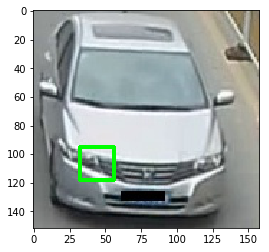

17 /home/bnminh/projects/ai2/SOURCE/veri/TRAIN_RFCN/0572_c015_00021605_0.txt


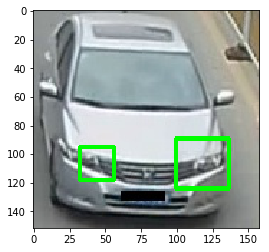

In [48]:
i = 17
pic = Image.open(VERI_TRAIN_ROOT+osp.basename(file_list[i]).replace('txt','jpg'))
pic = np.array(pic)
f_content = open(file_list[i]).readlines()
for obj in f_content:
    obj_name,x_min,y_min,x_max,y_max = obj.split(' ')
    x_min,y_min,x_max,y_max = [int(u) for u in [x_min,y_min,x_max,y_max]]
    pic = cv2.rectangle(pic, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
    print(i, file_list[i])
    plt.imshow(pic)
    plt.show()

In [62]:
file_list[0].split('/')[-1]

'0531_c009_00056345_0.txt'

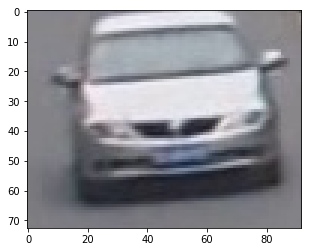

In [82]:
for i in range(490,500):
    pic = Image.open(VERI_TRAIN_ROOT+osp.basename(file_list[i]).replace('txt','jpg'))

    plt.imshow(np.array(pic))

    pic = np.array(pic)
    pic_rec = np.copy(pic)
    pic_point = np.copy(pic)
    f_content = open(file_list[i]).readlines()
    for obj in f_content:
        
      
                   
        obj_name,x_min,y_min,x_max,y_max = obj.split(' ')
        x_min,y_min,x_max,y_max = [int(u) for u in [x_min,y_min,x_max,y_max]]
        
        
        roi_pic = pic[y_min:y_max,x_min:x_max,:]
        
        im_save_path = 'dtle_tmp/' + file_list[i].split('/')[-1]
        if not os.path.exists(im_save_path):
            os.makedirs(im_save_path)
        if 0 not in roi_pic.shape:
            plt.imsave(os.path.join(im_save_path,'x{}y{}.png'.format(x,y)), roi_pic)
            
        x = (x_min + x_max) // 2
        y = (y_min + y_max) // 2
        pic_rec = cv2.rectangle(pic_rec, (x_min, y_min), (x_max, y_max), (250, 137, 20),2)
        pic_point = cv2.circle(pic_point, (x,y),5,(24,144,255),-1)
        
        
    plt.imsave(os.path.join(im_save_path,'point.png'), pic_point)
    plt.imsave(os.path.join(im_save_path,'rec.png'), pic_rec)
    
#     print(i, file_list[i])
#     plt.imshow(pic)
#     plt.imsave(os.path.join(im_save_path,'roi_box.png'), pic)
#     plt.show()


In [60]:
!pwd

/home/bnminh/projects/ai2/SOURCE/All_notebook


In [54]:
for obj in f_content:
    obj_name,x_min,y_min,x_max,y_max = obj.split(' ')
    x_min,y_min,x_max,y_max = [int(u) for u in [x_min,y_min,x_max,y_max]]

In [55]:
x_max

134

In [8]:
open('/home/bnminh/projects/ai2/SOURCE/veri/TRAIN_RFCN/0587_c003_00024905_0.txt').readlines()

['rear_light 151 113 202 167\n']

In [ ]:
open('/home/bnminh/projects/ai2/SOURCE/veri/TRAIN_RFCN/0587_c003_00024905_0.txt').readlines()

In [9]:
VERI_KEYPOINT_FILE_TRAIN

'/home/hthieu/AICityChallenge2019/data/VeRi/keypoint_train.txt'